In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import mlfast

In [3]:
plt.rcParams['font.family'] = 'serif'# 'sans-serif'
plt.rcParams['font.serif'] = "STIXGeneral"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rc("text",usetex=True)
plt.rc("font",family="serif")
plt.rc("font",serif="STIXGeneral")

## FFT based method

In [4]:
mag = mlfast.mag_fft.magnification(profile_names=['disk', 'limb1'])

CPU times: user 1.57 ms, sys: 768 µs, total: 2.34 ms
Wall time: 1.72 ms
CPU times: user 1.85 ms, sys: 138 µs, total: 1.99 ms
Wall time: 1.74 ms
CPU times: user 2.19 ms, sys: 108 µs, total: 2.3 ms
Wall time: 2.41 ms


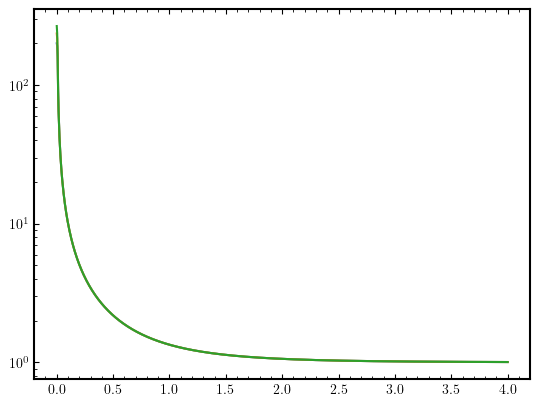

In [5]:
rho = 0.01
u = np.linspace(0.0, 4.0 ,1000)
%time a_disk = mag.A_disk(u, rho)
%time a_limb1 = mag.A_limb1(u, rho)
%time a_limb2 = mag.A_limb2(u, rho)

plt.yscale('log')
plt.plot(u, a_disk)
plt.plot(u, a_limb1)
plt.plot(u, a_limb2)
plt.show()

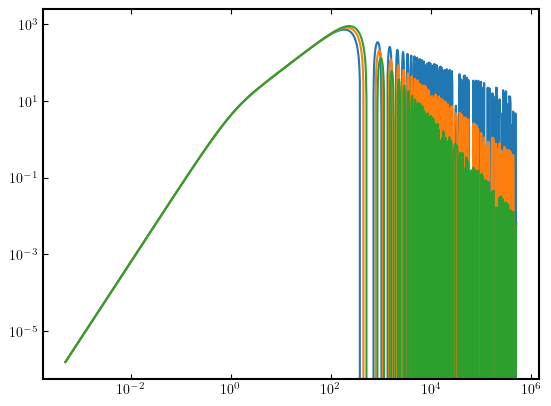

In [6]:
k = mag.k
apk = mag.apk
plt.figure()
plt.loglog(k, apk*k**2*mlfast.mag_fft.sk_disk(k, rho) )
plt.loglog(k, apk*k**2*mlfast.mag_fft.sk_limb(k, rho, 1) )
plt.loglog(k, apk*k**2*mlfast.mag_fft.sk_limb(k, rho, 2) )
plt.show()

## Witt Mao analytic

CPU times: user 2.23 s, sys: 13.3 ms, total: 2.25 s
Wall time: 2.27 s


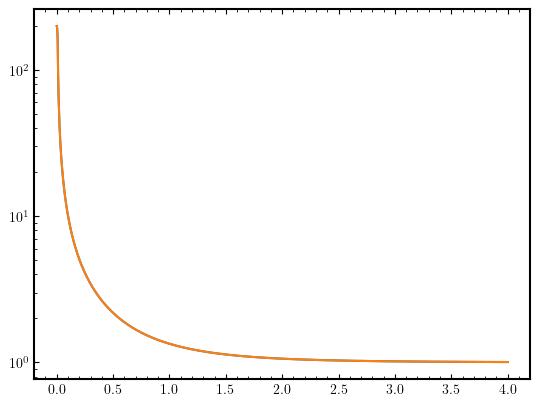

In [7]:
%time a_disk_WittMao1994 = mlfast.mag_wm.A_disk(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_disk)
plt.plot(u, a_disk_WittMao1994)
plt.show()

## Gould (1994), Yoo et al. (2004)

CPU times: user 1.36 ms, sys: 1.01 ms, total: 2.37 ms
Wall time: 3.33 ms


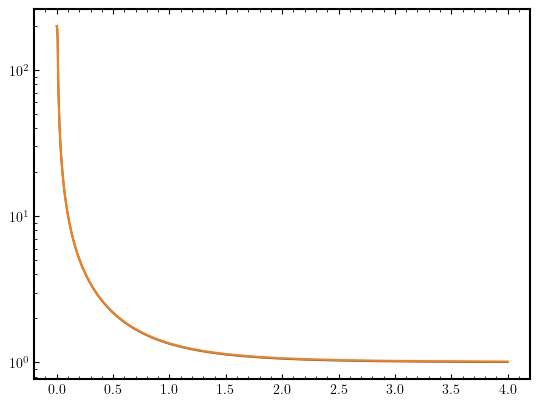

In [8]:
%time a_disk_Gould = mlfast.mag_yoo.A_disk(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_disk)
plt.plot(u, a_disk_Gould)
plt.show()

CPU times: user 1.12 ms, sys: 681 µs, total: 1.8 ms
Wall time: 1.28 ms


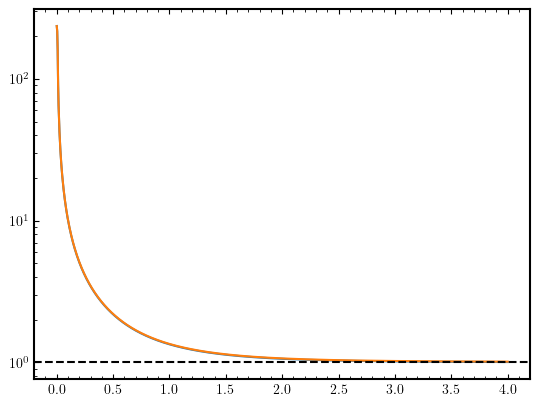

In [9]:
%time a_limb_Gould = mlfast.mag_yoo.A_limb(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_limb1)
plt.plot(u, a_limb_Gould)
plt.axhline(1.0, color='k',ls='--')
plt.show()

CPU times: user 1.24 ms, sys: 949 µs, total: 2.19 ms
Wall time: 2.59 ms


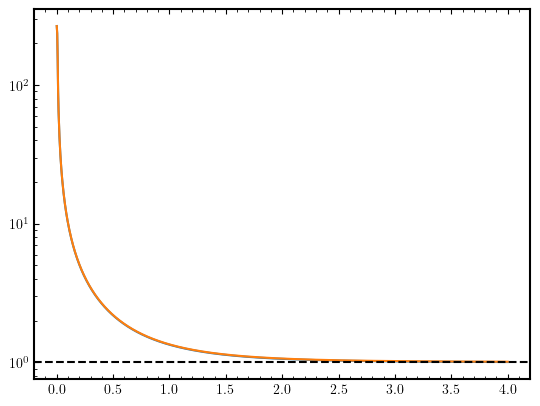

In [10]:
%time a_para_Gould = mlfast.mag_yoo.A_para(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_limb2)
plt.plot(u, a_para_Gould)
plt.axhline(1.0, color='k',ls='--')
plt.show()

## Witt & Barandela 2019: Taylar expansion and analytic approximation

CPU times: user 495 µs, sys: 273 µs, total: 768 µs
Wall time: 553 µs


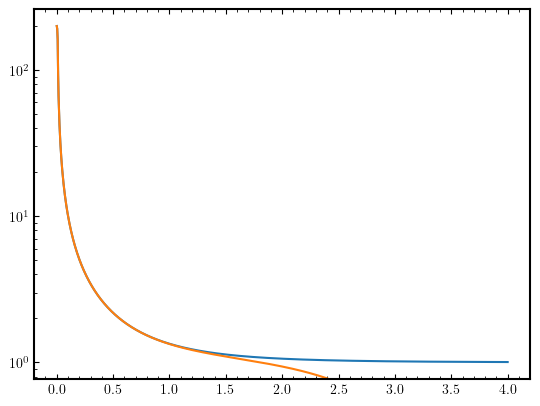

In [11]:
%time a_disk_WittBarandela2019 = mlfast.mag_wb.A_disk(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_disk)
plt.ylim(plt.ylim())
plt.plot(u, a_disk_WittBarandela2019)
plt.show()

CPU times: user 2.11 s, sys: 4.77 ms, total: 2.12 s
Wall time: 2.12 s


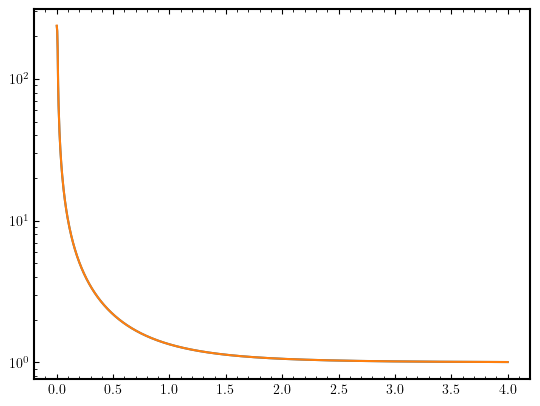

In [12]:
%time a_limb_WittBarandela2019 = mlfast.mag_wb.A_limb(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_limb1)
plt.ylim(plt.ylim())
plt.plot(u, a_limb_WittBarandela2019)
plt.show()

CPU times: user 429 µs, sys: 252 µs, total: 681 µs
Wall time: 470 µs


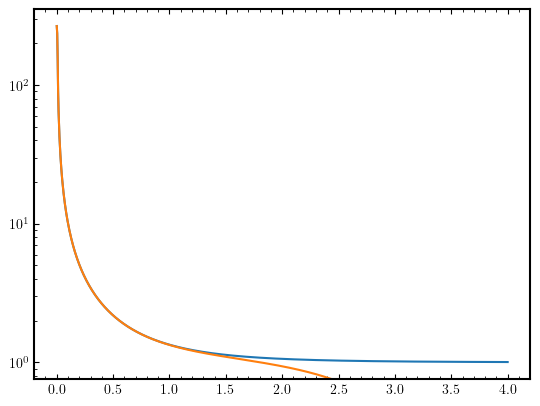

In [13]:
%time a_para_WittBarandela2019 = mlfast.mag_wb.A_para(u, rho)

plt.figure()
plt.yscale('log')
plt.plot(u, a_limb2)
plt.ylim(plt.ylim())
plt.plot(u, a_para_WittBarandela2019)
plt.show()

# How to generate test data

In [14]:
import testdata

In [15]:
# define profile or take predefine profile.
# Here I take predefined profile
s = testdata.s_disk
# define `u` bin to evaluate reference magnification
u = np.logspace(-2,2,100)
# define finite source parameter
rho = 0.1
# define file name to save the obtained reference test data
fname_to_save = 'testdata_temp.txt'
# generate test data.
# This takes time.
#testdata.gen(s, rho, fname_to_save, u=u)